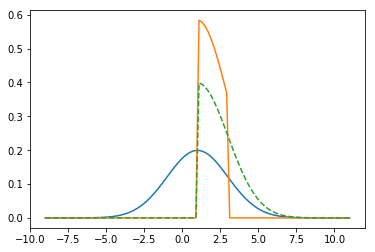

In [2]:
import chaospy as cp
import matplotlib.pyplot as plt
import numpy as np

mu = 1
sigma = 2

full_gaussian = cp.Normal(mu, sigma)
truncated_gaussian = cp.Truncnorm(mu, 3, mu, sigma)
folded_gaussian = cp.Foldnormal(mu, sigma, mu)

x = np.linspace(mu-5*sigma, mu+5*sigma, 100)
fig, ax = plt.subplots()
ax.plot(x, full_gaussian.pdf(x))
ax.plot(x, truncated_gaussian.pdf(x))
ax.plot(x, folded_gaussian.pdf(x), '--')

(array([108., 105., 102., 102.,  95.,  95.,  89.,  84.,  79.,  74.,  67.]),
 array([1.00167114, 1.18283714, 1.36400313, 1.54516912, 1.72633512,
        1.90750111, 2.08866711, 2.2698331 , 2.4509991 , 2.63216509,
        2.81333108, 2.99449708]),
 <a list of 11 Patch objects>)

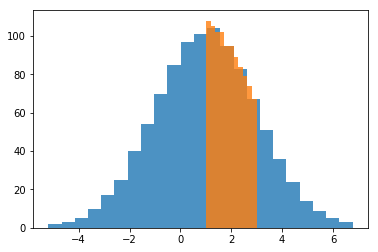

In [3]:
ns = 1000

samples_g = full_gaussian.sample(ns, rule='H')
samples_tg = truncated_gaussian.sample(ns, rule='H')
# samples_fg = folded_gaussian.sample(ns, rule='R')  # This currently raises an error

fig, ax = plt.subplots()
ax.hist(samples_g, alpha=.8, bins='auto')
ax.hist(samples_tg, alpha=.8, bins='auto')